# <center>  Exponentiation rapide (binaire) </center>

In [5]:
def expo_rapide(a,k,n):
    a= a%n
    if k==O:
        return 1
    elif (k//2):
        b= expo_rapide(a, k//2, n)
        return (b**2)%n
    else:
        b=expo_rapide(a,(k-1)//2,n)
        return(a*(b**2))%n
    

In [ ]:
def expo_rapide(a,k,n):
    a= a%n
    if k==0:
        return 1
    elif (k%2==0):
        b= expo_rapide(a, k//2,n)
        return (b**2)%n
    else:
        b= expo_rapide(a, (k-1)//2,n)
        return a*(b**2)%n
    

### Algorithme naïf 

In [6]:
def puissance_mod(a,k,n):
	res=1
	for i in range(k):
		res=(res*a)%n
		i+=1
	return res

In [7]:
puissance_mod(2,65,53)

30

**Rappel :** L'instruction ${\tt pow(a,k,n)}$ en Python permet déjà de calculer $a^k [n]$ via un algorithme d'exponentiation rapide.

In [8]:
pow(2,390,391)

285

### Exponentiation rapide binaire : algorithme récursif

In [9]:
def expo_rapide(a,k,n):
    x=a%n
    if (k==0):
        return 1
    elif (k%2==0):
        aux=expo_rapide(x,k//2,n)
        res=(aux**2)%n
        return res
    else:
        aux=expo_rapide(x,(k-1)//2,n)
        res=(x*(aux**2))%n
        return res

In [10]:
expo_rapide(2,390,391)

285

### Comparaison entre les deux algorithmes

#### Mesure sur un calcul unique avec des grands entiers

In [11]:
import time
from random import *

In [12]:
k=randint(pow(10,7),pow(10,8))
a=randint(pow(10,50),pow(10,51))
n=65537 #On choisit un nombre premier

print("Valeur de a et n :",a,n)

start = time.time()
res=expo_rapide(a,k,n)
end = time.time()
print("Temps rapide :",end-start)

start = time.time()
resb=puissance_mod(a,k,n)
end = time.time()
print("Temps naïf : ",end-start)

Valeur de a et n : 689296980787756197080705548401737791048581744568598 65537
Temps rapide : 0.00018453598022460938
Temps naïf :  16.622315406799316


#### Plusieurs tests et affichage de la courbe

In [13]:
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'matplotlib'

Valeur de a et n : 752387908224873107186312109249955016227891997964429 65537
Valeur de k :  290634 	 	 Temps naif 0.1353154182434082 	 	 Temps rapide 9.608268737792969e-05
Valeur de k :  581268 	 	 Temps naif 0.19063544273376465 	 	 Temps rapide 3.3855438232421875e-05
Valeur de k :  1162536 	 	 Temps naif 0.3563418388366699 	 	 Temps rapide 3.24249267578125e-05
Valeur de k :  2325072 	 	 Temps naif 0.6864042282104492 	 	 Temps rapide 3.743171691894531e-05
Valeur de k :  4650144 	 	 Temps naif 1.3349573612213135 	 	 Temps rapide 3.4332275390625e-05
Valeur de k :  9300288 	 	 Temps naif 2.682542324066162 	 	 Temps rapide 4.553794860839844e-05
Valeur de k :  18600576 	 	 Temps naif 5.149418592453003 	 	 Temps rapide 4.482269287109375e-05
Valeur de k :  37201152 	 	 Temps naif 10.477925777435303 	 	 Temps rapide 3.2901763916015625e-05
Valeur de k :  74402304 	 	 Temps naif 20.574947357177734 	 	 Temps rapide 3.790855407714844e-05
Valeur de k :  148804608 	 	 Temps naif 40.23434901237488 	 

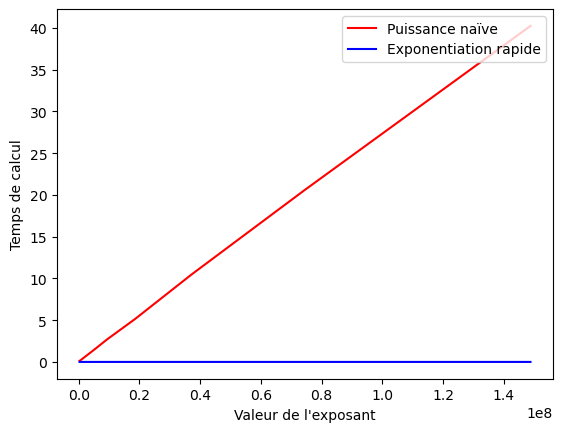

In [ ]:
k=randint(pow(10,5),pow(10,6))
nb_test=10
temps_naif=[0]*nb_test
temps_rapide=[0]*nb_test
tailles=[0]*nb_test
a=randint(pow(10,50),pow(10,51))
n=65537 #On choisit un nombre premier

print("Valeur de a et n :",a,n)

for i in range(nb_test):
    tailles[i]=k

    start = time.time()
    res=puissance_mod(a,k,n)
    end = time.time()
    temps_naif[i]=end-start

    start = time.time()
    resb=expo_rapide(a,k,n)
    end = time.time()
    temps_rapide[i]=end-start	
    print("Valeur de k : ",k,"\t \t Temps naif",temps_naif[i],"\t \t Temps rapide",temps_rapide[i])
    k*=2


plt.plot(tailles,temps_naif,"-r",label="Puissance naïve")
plt.plot(tailles,temps_rapide,"-b",label="Exponentiation rapide")
plt.legend(loc="upper right")
plt.xlabel("Valeur de l'exposant")
plt.ylabel("Temps de calcul")
plt.show()